In [4]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle("accidents.pkl.gz")
df["date"] = df["p2a"].astype("datetime64")

/home/xsedla1d/school/IZV-project/.venv/lib64/python3.9/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


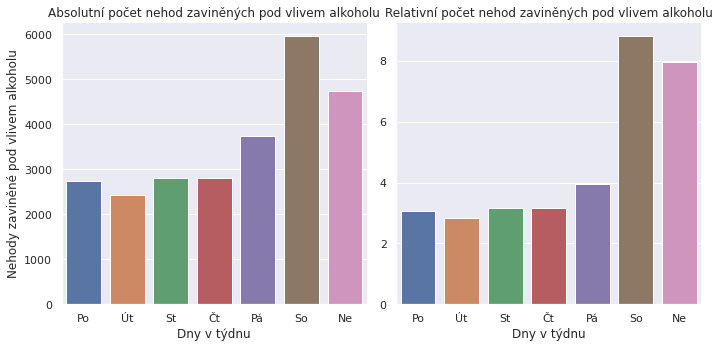

In [5]:

df["day"] = df["date"].dt.dayofweek
df["Počet nehod"] = 1

alcohol_mask = df["p11"].isin([1, 3, 5, 6, 7, 8, 9])

alcohol_df = df[alcohol_mask].copy()
no_alcohol_df = df[~alcohol_mask].copy()

grouped_alcohol = alcohol_df.groupby(["day"]).agg({"Počet nehod": "sum"})
grouped_no_alcohol = no_alcohol_df.groupby(["day"]).agg({"Počet nehod": "sum"})

grouped_alcohol_relative = grouped_alcohol / (grouped_alcohol + grouped_no_alcohol) * 100

grouped_alcohol["type"] = "Absolutní počet nehod zaviněných pod vlivem alkoholu"
grouped_alcohol_relative["type"] = "Relativní počet nehod zaviněných pod vlivem alkoholu"

result = pd.concat([grouped_alcohol, grouped_alcohol_relative]).reset_index()
result["day"] = result["day"].map({
        0: "Po",
        1: "Út",
        2: "St",
        3: "Čt",
        4: "Pá",
        5: "So",
        6: "Ne"
})

sns.set_theme()
g = sns.catplot(data=result, x="day",
            y="Počet nehod", ci=None, col="type", kind="bar",
            sharex=False, sharey=False)
g.set_axis_labels("Dny v týdnu", "Nehody zaviněné pod vlivem alkoholu").set_titles("{col_name}")